<a href="https://colab.research.google.com/github/arara90/Python-Machine-learning/blob/master/190407_ch4_%EB%AA%A8%EB%8D%B8%ED%9B%88%EB%A0%A8_%EC%84%A0%ED%98%95%ED%9A%8C%EA%B7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 1. 선형 회귀
### 2. 경사 하강법 : 반복적 최적화 방법
1. 배치 경사 하강법
2. 확률적 경사 하강법
3. 미니배치 경사 하강법

### 3. 다항 회귀
### 4. 학습 곡선

---

### 5. 규제가 있는 선형 모델
1. 릿지 회귀
2. 라쏘 회귀
3. 엘라스틱넷
4. 조기 종료

### 6. 로지스틱 회귀
1. 확률 추정
2. 훈련과 비용함수
3. 소프트 맥스 회귀
4. 소프트 맥스 회귀

#1. 선형 회귀

#### 선형회귀와 다항회귀
* 선형 회귀 훈련 모델
> 1. **공식** 사용하여 훈련 세트에 가장 잘 맞는 모델 파라미터를 해석적으로 구함(바로 결과 얻을 수 있는 수학 공식) -> 정규 방정식
> 2. **경사하강법(GD)** 반복적인 최적화 방식 사용하여 모델 파라미터를 조금씩 바꾸면서 구함.


## 4.1 선형 회귀

>>> ![식 4-1](https://github.com/arara90/Python-Machine-learning/blob/master/%EC%95%84%EB%9D%BC/img/Study_ch4/4_1_%EC%84%A0%ED%98%95%ED%9A%8C%EA%B7%80.png?raw=true)

> 특성의 가중치 합과 편향(절편, bias)이라는 상수를 더해 예측값(y)를 구한다.
2
>>> ![식 4-2](https://github.com/arara90/Python-Machine-learning/blob/master/%EC%95%84%EB%9D%BC/img/Study_ch4/4_2.png?raw=true)

>> * 전치 행렬 (X)^T

>>> ![전치행렬](https://github.com/arara90/Python-Machine-learning/blob/master/%EC%95%84%EB%9D%BC/img/Study_ch4/4_2_%EC%A0%84%EC%B9%98%ED%96%89%EB%A0%AC.png?raw=true)

>> * Dot Product
>>> ![점곱](https://algebra1course.files.wordpress.com/2013/02/slide10.jpg)

>> * **모델 훈련**이란?
2장에서 회귀에 가장 널리 사용되는 성능 측정 지표는 평균 제곱근 오차(RMSE)라고 했음
따라서, **선형 회귀 모델을 훈련시키는 것은 RMSE를 최소화하는 θ를 찾는 것**.
실제로는 MSE를 최소화하는 것이 같은 결과를 낸다 
*이탤릭체 텍스트*

### 4.1.1 정규방정식
 > 비용 함수를 최소화 하는 다음의  θ를 찾는 것.
 
 > ![정규방정식](https://github.com/arara90/Python-Machine-learning/blob/master/%EC%95%84%EB%9D%BC/img/Study_ch4/4_4_%EC%A0%95%EA%B7%9C%EB%B0%A9%EC%A0%95%EC%8B%9D.png?raw=true)
 
 ### 4.1.2 계산복잡도
> (X)^T · X 의 역행렬을 계산하는 정규 방정식의 계산 복잡도는 -> O(n^2.4) ~ O(n^3) 사이 
>> 즉, 특성 수가 두배로 늘어나면 계산 시간이 5.3~8배로 늘어남

 ### 4.1.2 실습

In [12]:
#1. 정규방정식으로 구하기

import matplotlib.pyplot as plt
import numpy as np

# y = 3x + 4 + 가우시안 노이즈
X= 2*np.random.rand(100,1)
y = 4 + 3 * X + np.random.randn(100,1)
  
X_b = np.c_[np.ones((100,1)), X] #모든 샘플에 x0 = 1 추가
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
print(theta_best)


[[4.2775251 ]
 [2.80957942]]


#### 실제 함수는 y = 4x + 3x + 가우시안_노이즈이다. but, 기대 값은 = 4, 3
#### 다음은 theata_best를 이용해서 예측

In [6]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)), X_new]
# np.c_[a,b] -> 배열 a,b 옆으로 붙이기 https://rfriend.tistory.com/352 
print(X_new_b)

[[1. 0.]
 [1. 2.]]


In [23]:
y_pre = X_new_b.dot(theta_best)
y_pre

array([[4.2775251 ],
       [9.89668395]])

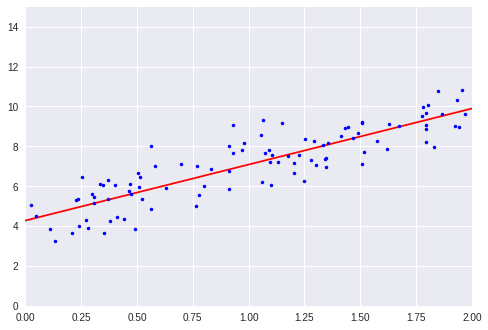

In [15]:
plt.plot(X_new, y_pre, "r-")
plt.plot(X,y,"b.")
plt.axis([0,2,0,15])
plt.show()

###2. 사이킷런으로 구하기

In [19]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_, lin_reg.coef_

(array([4.2775251]), array([[2.80957942]]))

In [20]:
lin_reg.predict(X_new)

array([[4.2775251 ],
       [9.89668395]])

#2. 경사 하강법(Gradient Descent)

참고사이트
> 1. https://seamless.tistory.com/38
> 2. https://developers.google.com/machine-learning/crash-course/reducing-loss/an-iterative-approach?hl=ko


* 경사 하강법? 
비용 함수를 최소화하기 위해 반복해서 파라미터를 조정해 가는 것.
> * 임의의 값으로 시작 => 무작위 초기화
> *  MSE가 감소되는 방향으로 진행하여, 알고리즘이 최소값에 수렴할 때까지 점진적으로 향상

>> ![경사하강](https://t1.daumcdn.net/cfile/tistory/99E6363359D86A8805)

* 그래디언트(Gradient):   비용함수의 미분값. 0이될수록 좋음 (최소)

* 학습률 : 스텝의 크기
> * 학습률이 너무 작으면 알고리즘이 반복을 많이 수행 -> 느림
> * 학습률이 너무 크면 골짜기를 가로지르는 상황 발생


## 4.1 배치 경사 하강법
> **4.1.1 배치 경사 하강법? ** 현 weight의 기울기(gradient)를 구하고, loss를 줄이는 방향으로 업데이터(조정)
>> Loss function? 현재 가중치에서 "틀린 정도"를 알려주는 함수

> 1. 현재 wight에서 내가 가진 데이터를 다 넣어주면? -> 전체 에러 계산 -> 미분한다 -> 에러 줄이는 방향을 알 수 있다.
> 2. 해당 방향으로 정해진 스텝량(learning rate)을 곱해서 weight이동 -> 반복 학습

>> ![weight의 업데이트](https://t1.daumcdn.net/cfile/tistory/99EC803359D86AF115)

> * **단점** :  매스텝 전체 훈련 세트를 사용해 그레디언트를 계산 -> 느리다.
>* **장점** : 특성의 수에는 그다지 민감하지 않아, 특성이 많은 데이터에 유리함.

> 경험적으로 전 set가 아닌 일부 예시에서만 구한 결과가 대체로 잘 맞는다는 것을 알게되었음.
 
 >> -> 확률적 경사 하강법,  미니 배체 경사 하강법

## 4.2 확률적 경사 하강법(SGD)
> **4.2.1 확률적 경사 하강법? ** 매 스텝에서 딱 한개의 샘플을 무작위로 선택하고, 그 하나의 샘플에 대한 Gradient를 계산
>> 배치보다 불안정하지만 무작위로 값이 움직이기 때문에 지역 최소값을 벗어나고, 전역 최소값을 찾을 가능성이 높다.
>> 하지만, 정확한 전역 최소값에 다다르기는 힘들다.
>>> * 첫 시작에 학습률은 높게하고, 점점 학습률을 낮추면 효과적으로 구할 수 있다.
>>> * **학습 스케쥴** : 매 반복에서 학습률을 결정하는 함수
>>> * **에포크 (epoch) **: 훈련세트 전체가 한차례 반복되는 단위 ( 2번 돌면 2 epoch)
>>> * 에포크 사이에 훈련 세트를 섞는 작업을 추가하면 이미 한 번 선택된 샘플이 재선택되는 것을 피할 수 있다.

## 4.3 미니 배치 확률적 경사 하강법
> **4.3.1 미니 배치 확률적 경사 하강법? ** 미니 배치라고 불리는 임의의 작은(10~1000개)의 데이터 세트에 대해 계산
>>  확률적 경사하강법의 노이즈는 줄이고, 배치 경사하강법 보다는 효율적.
>> 미니 배치의 크기가 크면? 전역 최소값에 더 가까이 도달하지만, 지역 최소값에서 빠져나오기는 더 힘듦.



![알고리즘비교](https://github.com/arara90/Python-Machine-learning/blob/master/%EC%95%84%EB%9D%BC/img/Study_ch4/4_7.png?raw=true)
> m: 샘플수 / n : 특성수 / 하이퍼 파라미터 